In [1]:
import os
import datetime
from dateutil.relativedelta import relativedelta

import cv2
import numpy as np
import matplotlib.pyplot as plt
from moviepy.editor import ImageSequenceClip

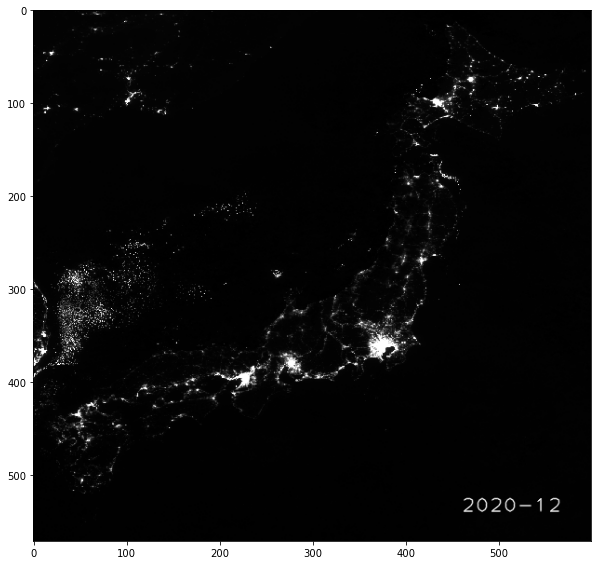

In [2]:
data_path = "../data/timelapse/timelapse.gif"
gif = cv2.VideoCapture(data_path)
fps = gif.get(cv2.CAP_PROP_FPS)

images = []
i = 0
start_date = datetime.datetime(year=2015,month=1,day=1)
while True:
    is_success, img = gif.read()
    date = (start_date + relativedelta(months=i)).strftime("%Y-%m")    
    if not is_success:
        break

    cv2.putText(img, date, (460, 540),
               cv2.FONT_HERSHEY_PLAIN, 1.5,
               (255, 255, 255), 1, cv2.LINE_AA)
    
    images.append(img)
    i += 1
    
plt.figure(figsize=(10,10))
plt.imshow(images[-1])
plt.show()

In [3]:
images = np.array(images)
images = images[:, :, :, [2, 1, 0]]    # BGR <-> RGB
images = list(images)

clip = ImageSequenceClip(images, fps=fps)
clip.write_gif(data_path[:-4] + "_caption.gif")

t:   6%|▌         | 4/72 [00:00<00:01, 38.39it/s, now=None]

MoviePy - Building file ../data/timelapse/timelapse_caption.gif with imageio.
